# Time Series Analysis

## Submission Date: 23/01/2023

## Points: 10

In this lab, we will practice to:

- Create time series objects
- Decompose a time series to trending, seasonal, and noise components
- Conduct autocorrelation analysis: plotting and interpreting correlograms
- Forecast and understanding/ evaluating the forecasting models using [forecast package](https://cran.r-project.org/web/packages/forecast/index.html)


# Theorie 1

b), g), d), h)

# Theorie 2

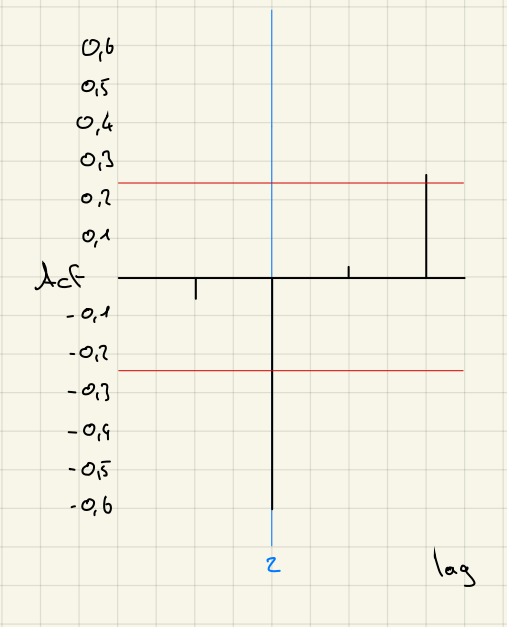

## 1. Time series object creation

In this section, we will examine some important arguments of the ***ts*** function, which is used to create time series object from a list of values

In [1]:
#required library
library(tidyverse)

install.packages("forecast",repos = "https://cran.uni-muenster.de/")

# in case of error messages: update IRkernel package
install.packages(c('IRkernel', 'IRdisplay', 'repr'))

library(forecast)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
also installing the dependencies 'xts', 'TTR', 'quadprog', 'quantmod', 'fracdiff', 'lmtest', 'Rcpp', 'timeDate', 'tseries', 'urca', 'zoo', 'RcppArmadillo'




package 'xts' successfully unpacked and MD5 sums checked
package 'TTR' successfully unpacked and MD5 sums checked
package 'quadprog' successfully unpacked and MD5 sums checked
package 'quantmod' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'timeDate' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'zoo' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\trist\AppData\Local\Temp\RtmpwVUiyb\downloaded_packages
package 'IRkernel' successfully unpacked and MD5 sums checked
package 'IRdisplay' successfully unpacked and MD

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



### Example

In this example, we will use the [**monthly milk production** dataset](https://rdrr.io/cran/fma/man/milk.html), which is also provided in the `data` folder. We will learn how to create different time series of monthly milk production which starts and ends at different months/years

In [2]:
#load the dataset
milk_ds <- read.csv('data/monthly-milk-production-pounds-p.csv', header = TRUE)
#rename columns of the dataset
names(milk_ds) <- c('month','production')
#view some first rows
head(milk_ds)

,month,production
,<chr>,<int>
1,1962-01,589
2,1962-02,561
3,1962-03,640
4,1962-04,656
5,1962-05,727
6,1962-06,697


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1962,589,561,640,656,727,697,640,599,568,577,553,582
1963,600,566,653,673,742,716,660,617,583,587,565,598
1964,628,618,688,705,770,736,678,639,604,611,594,634
1965,658,622,709,722,782,756,702,653,615,621,602,635
1966,677,635,736,755,811,798,735,697,661,667,645,688
1967,713,667,762,784,837,817,767,722,681,687,660,698
1968,717,696,775,796,858,826,783,740,701,706,677,711
1969,734,690,785,805,871,845,801,764,725,723,690,734
1970,750,707,807,824,886,859,819,783,740,747,711,751
1971,804,756,860,878,942,913,869,834,790,800,763,800


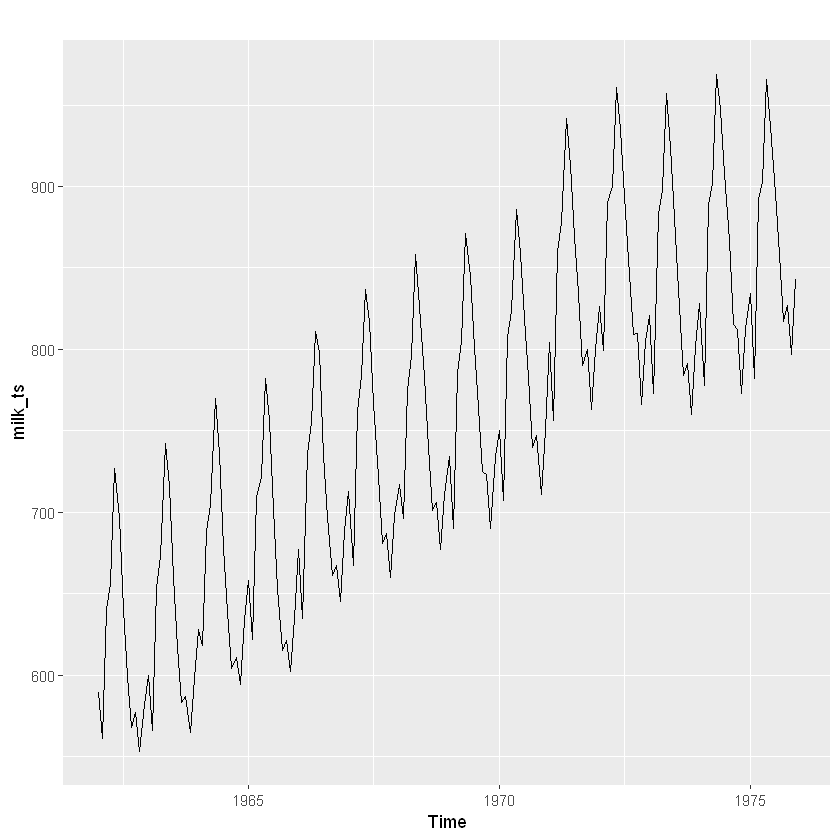

In [3]:
# create a time series starting from May 1962 and ending at June 1968
milk_ts = ts(milk_ds$production,frequency = 12, start = 1962, end = c(1975, 12))

# in the above command, please note the following arguments in the ts function:
# the "frequency" argument: the number of observations before the seasonal pattern repeats,
#           when set to 4 and 12 the created time series will be printed out in quarterly and yearly format, respectively

# the "start" argument: can accept an integer or a list of 2 integer numbers,
#           this is the time of the first observation and (if 2 integer numbers is provided)
#           the starting element of the first observation

# the "end" argument: can accept an integer or a list of 2 integer numbers,
#           this is the time of the last observation and (if 2 integer numbers is provided)
#           the starting element of the last observation

# view the created series
milk_ts

# plot the created series
autoplot(milk_ts)

In [6]:
# Practice: create a time series starting from September 1965 and ending at September 1970
ts(milk_ds$production,frequency = 12, start = c(1965, 9), end = c(1970, 9))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1965,,,,,,,,,589,561,640,656
1966,727,697,640,599,568,577,553,582,600,566,653,673
1967,742,716,660,617,583,587,565,598,628,618,688,705
1968,770,736,678,639,604,611,594,634,658,622,709,722
1969,782,756,702,653,615,621,602,635,677,635,736,755
1970,811,798,735,697,661,667,645,688,713,,,


## 2. Decomposition

In this section, we will use the datasets provided in the [**fpp**](https://cran.r-project.org/web/packages/fpp/index.html) package ("Forecasting: principles and practice"), which are used for illustration in [this very useful book](https://otexts.com/fpp2/) for forescasting

In [7]:
#install the package
install.packages("fpp",repos = "https://cran.uni-muenster.de/")
#load the package
library(fpp)
#view datasets provided in the package
data(package = 'fpp')

also installing the dependencies 'fma', 'expsmooth'




package 'fma' successfully unpacked and MD5 sums checked
package 'expsmooth' successfully unpacked and MD5 sums checked
package 'fpp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\trist\AppData\Local\Temp\RtmpwVUiyb\downloaded_packages


Loading required package: fma

Loading required package: expsmooth

Loading required package: lmtest

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: tseries



Data sets in package 'fpp':

a10                     Monthly anti-diabetic drug sales in Australia
                        from 1992 to 2008.
ausair                  Air Transport Passengers Australia
ausbeer                 Quarterly Australian Beer production
austa                   International vistors to Australia
austourists             International Tourists to Australia: Total
                        visitor nights.
cafe                    Quarterly expenditure on eating out in
                        Australia
credit                  Credit ratings on personal loans from an
                        Australian bank.
debitcards              Retail debit card usage in Iceland.
departures              Total monthly departures from Australia
elecequip               Electrical equipment manufactured in the Euro
                        area.
elecsales               Electricity sales to residential customers in
                        South Australia.
euretail                Quarterly 

### Example
In this example, we will inspect the dataset [**Electrical equipment manufactured in the Euro area**](https://rdrr.io/cran/fpp/man/elecequip.html), which is provided in the **fpp** package in time series form: the **elecequip** time series object

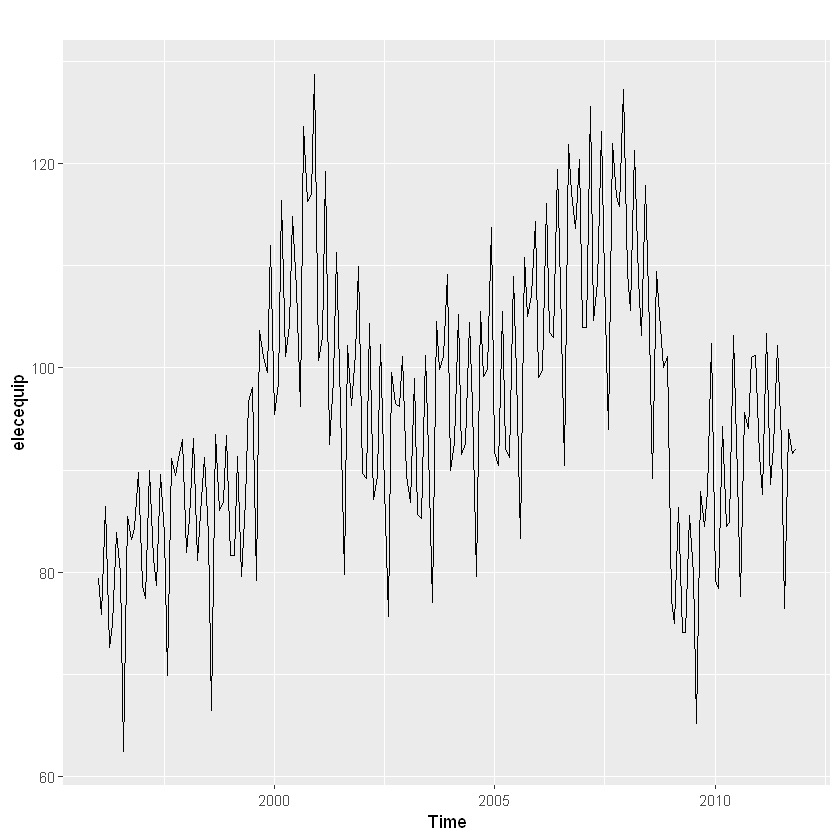

In [8]:
# plot the time series
autoplot(elecequip)

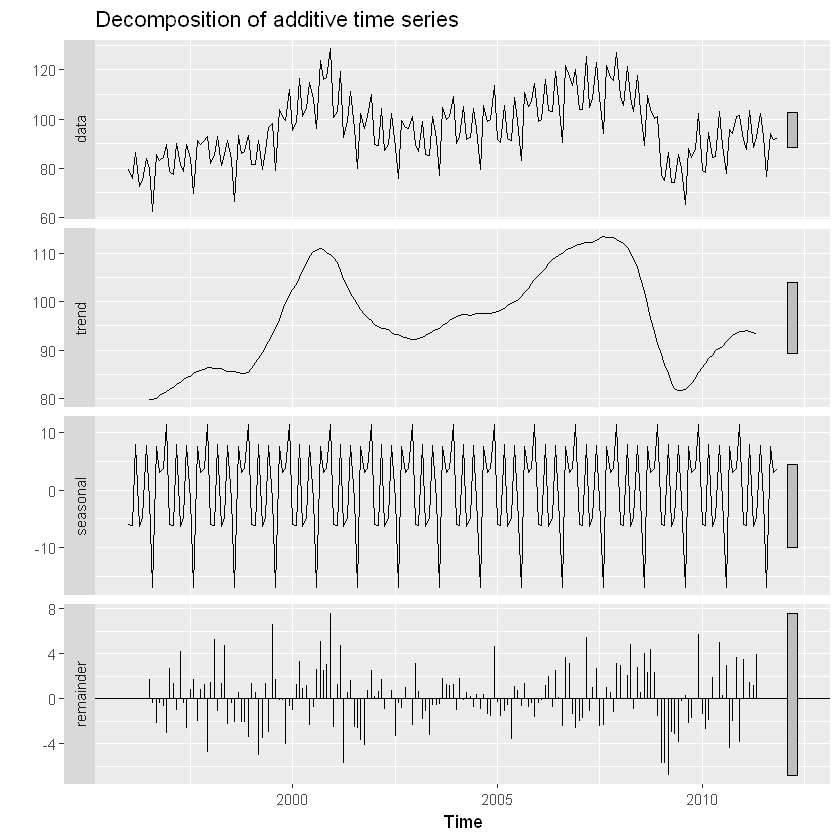

In [9]:
# decompose the time series into trend, seasonal, and error (remainder/noise) parts
elecequip_components <- decompose(elecequip)
autoplot(elecequip_components)

**Question:** Any insight from the plots above?

Trend peaks in the early 2000 and right before the global financial crisis.  
Multiple seasonal peaks throughout the year.  
Lot's of noise

### Exercise 1 -- 3 points
Inspect the dataset [**Quarterly retail trade: Euro area**](https://rdrr.io/cran/fpp/man/euretail.html), which is provided in the **fpp** package in time series form: the **euretail** time series object.

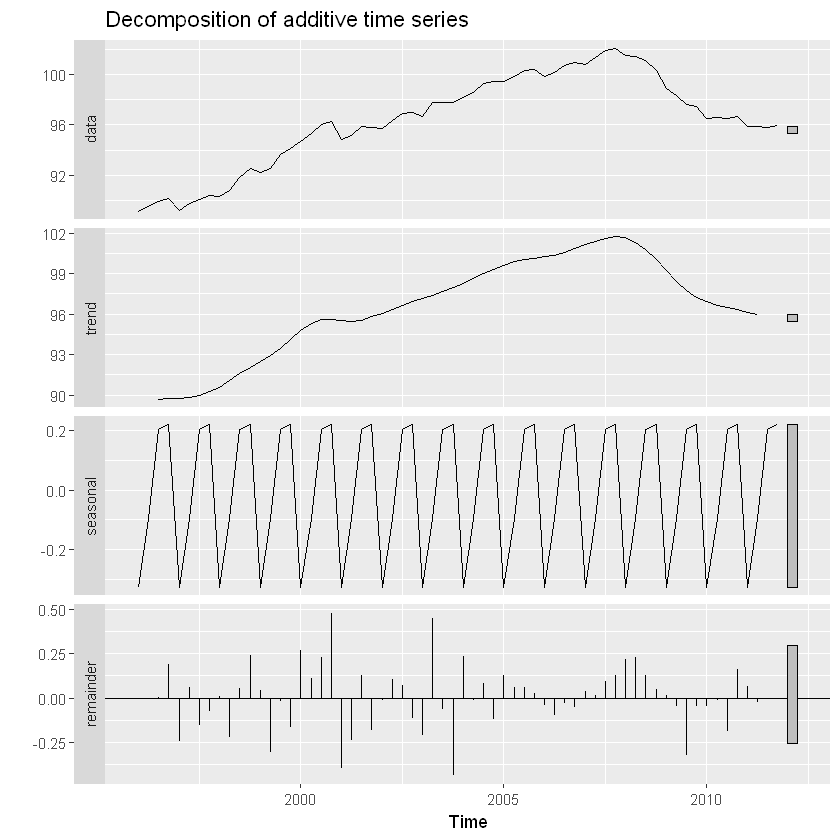

In [11]:
# YOUR CODE GOES HERE
euretail_components <- decompose(euretail)
autoplot(euretail_components)

# We find distinct seasonal trends that repeat every year
# There has also been a constant rise til about late 2007 early 2008 
# followed by a decline that seems to decelerate to the end of the dataset in 2011 and brings overall levels back to that of around 2000 to 2002.
# We speculate that the global financial crisis might be to blame.

## 3. Autocorrelation analysis

In this section, we will learn to plot and interpret correlogram of a time series. We will again use the datasets provided in **fpp** package

### Example
Inspect the autocorrelation of the [**income**](https://rdrr.io/cran/fpp/man/usconsumption.html) time series, which is provided in **usconsumption** dataset

,consumption,income
1970 Q1,0.6122769,0.496540
1970 Q2,0.4549298,1.736460
1970 Q3,0.8746730,1.344881
1970 Q4,-0.2725144,-0.328146
1971 Q1,1.8921870,1.965432
1971 Q2,0.9133782,1.490757


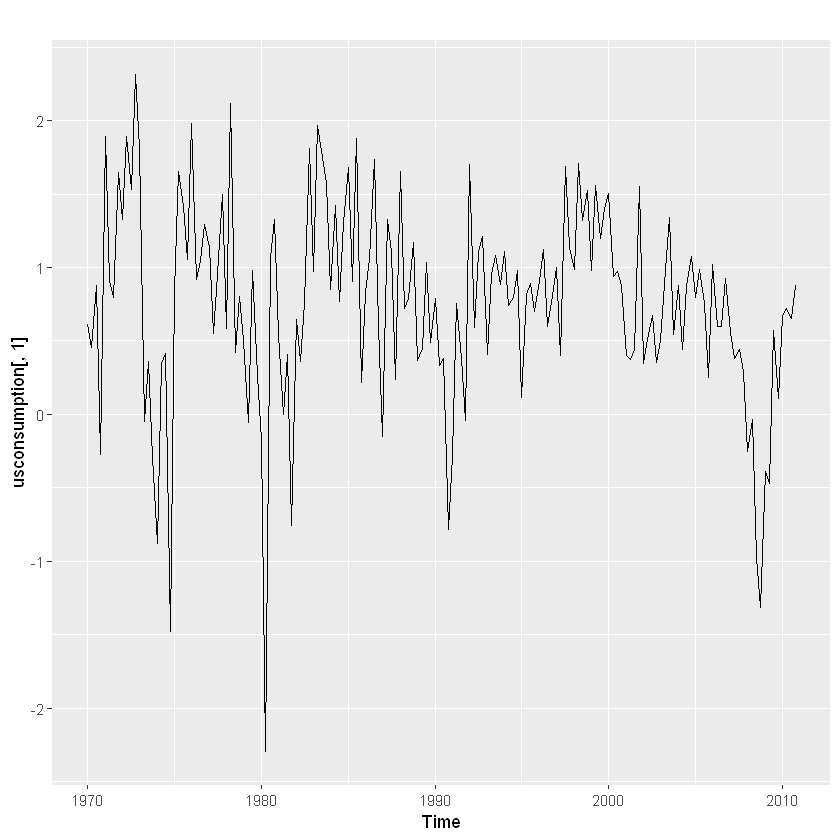

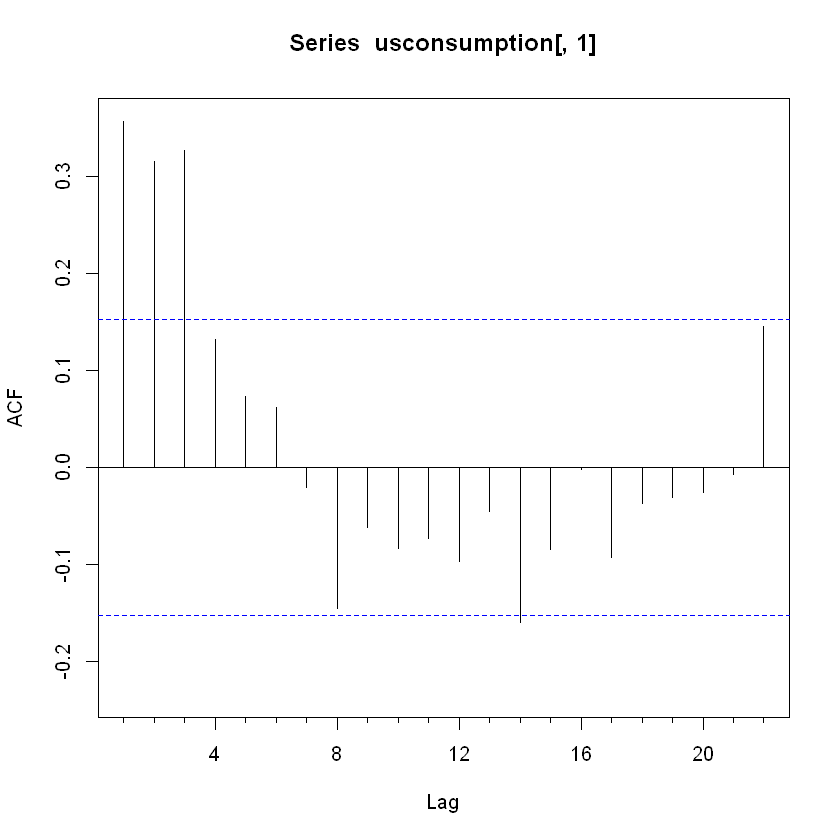

In [18]:
# view the dataset
head(usconsumption)

autoplot(usconsumption[,1])

#compute and plot correlogram
Acf(usconsumption[,1])

**Questions**
- Why is the ACF at lag 0 always 1?
- What does the correlogram tell us about the income time series?

- 0 means no offset and any Variable obviously perfectly correlates withitself
- strong positive correlation of small lag, means positive trends tend to last longer than 1 Quarter.
- negative correlation for a lag of 8-20 Quaters suggests repeating drops every 2-5 years. 

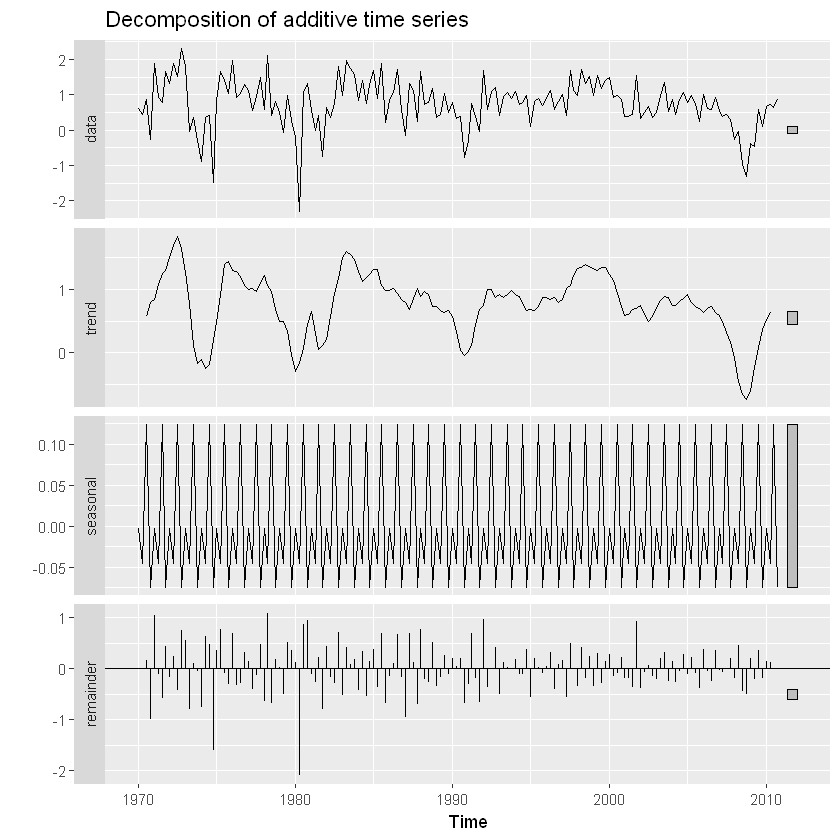

In [10]:
autoplot(decompose(usconsumption[,1]))


### Exercise 2 -- 3 points
Inspect the autocorrelation of the [**monthly milk production** dataset](https://rdrr.io/cran/fma/man/milk.html).

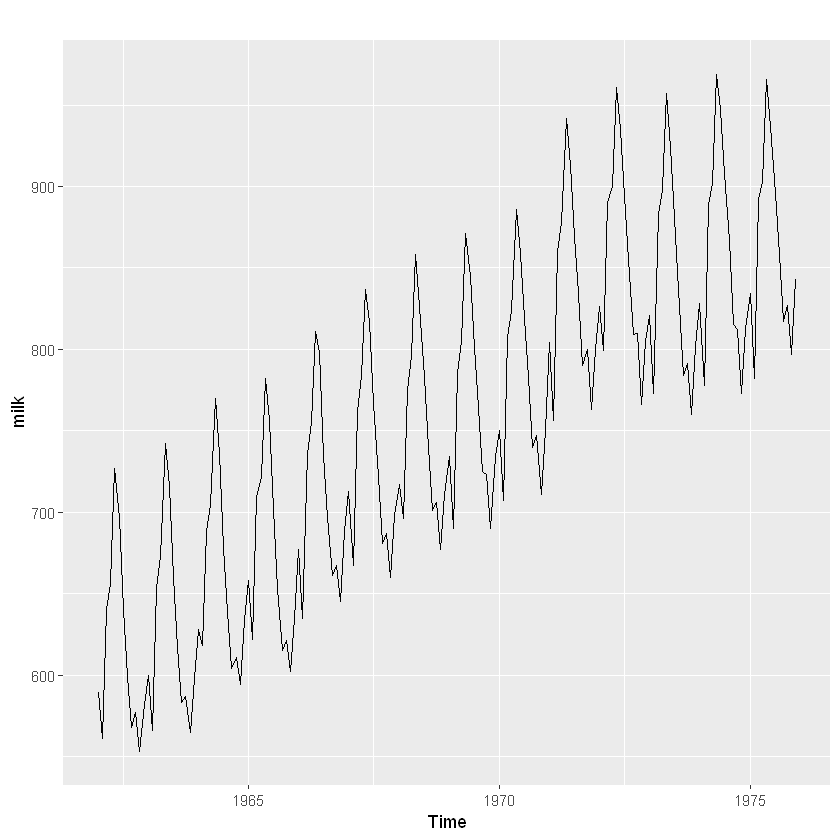

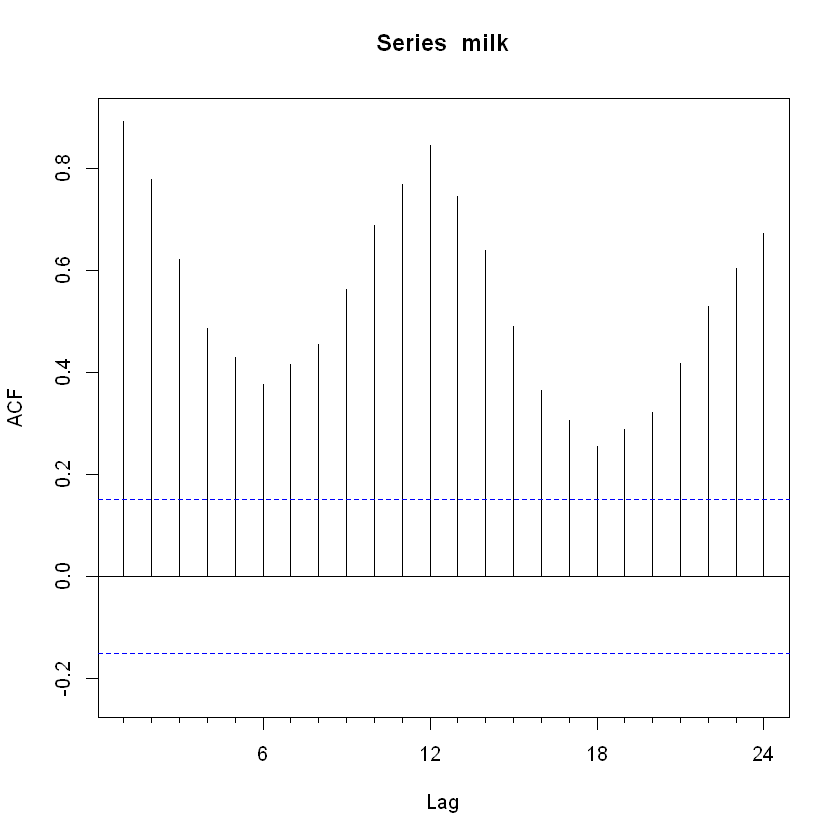

In [16]:
#YOUR CODE GOES HERE
autoplot(milk)
Acf(milk)

## 4. Forecasting with the ARIMA model
In this section, we will again use the [**monthly milk production** dataset](https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75).

[1] 855.2568 854.3142 859.4477 852.0701 854.3167 853.6325 853.8409 853.7774
 [9] 853.7967 853.7909 853.7927 853.7921

Series: milk_ts 
ARIMA(1,1,4) 

Coefficients:
          ar1     ma1     ma2      ma3      ma4
      -0.3045  0.2456  0.1500  -0.4257  -0.6493
s.e.   0.1158  0.0816  0.0545   0.0486   0.0614

sigma^2 = 1380:  log likelihood = -839.88
AIC=1691.77   AICc=1692.29   BIC=1710.48

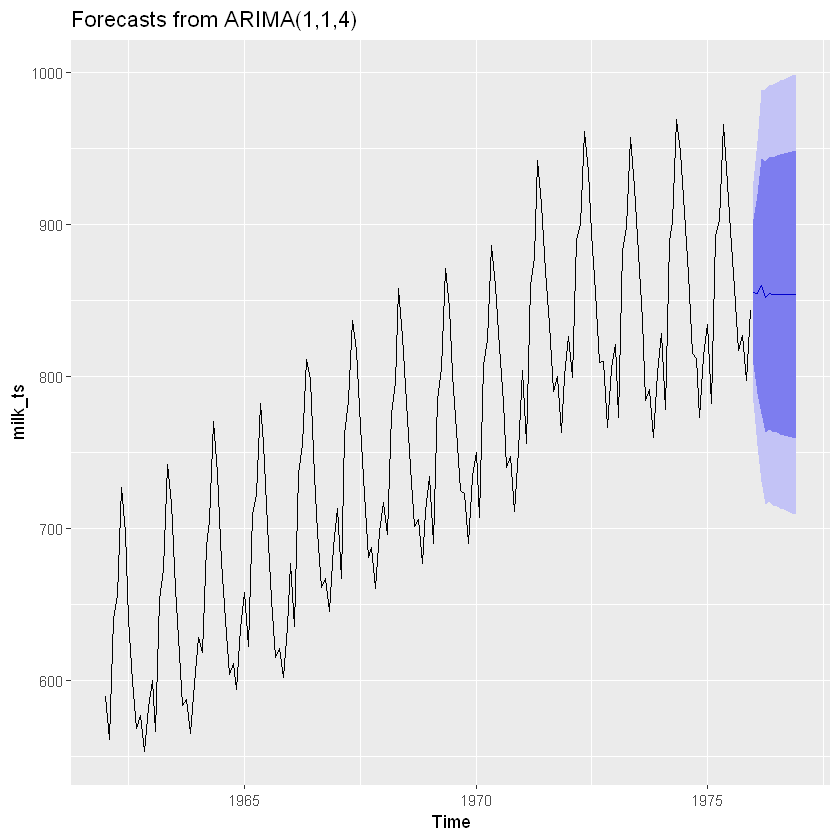

In [17]:
#load dataset
milk <- read.csv('data/monthly-milk-production-pounds-p.csv', header = TRUE)
names(milk) <- c('month','production')
#create a time series object
milk_ts = ts(milk$production,frequency = 12, start = 1962)

#fit a non-seasonal arima model with learnt parameters
milk_arima <- auto.arima(milk_ts, seasonal = FALSE)

#forecast for the next 12 months
milk_forecast <- forecast(milk_arima, h = 12)

#views the forecast's mean
c(milk_forecast$mean)

#plot the forecast
autoplot(milk_forecast)
#inspect model
milk_arima
#str(milk_arima)

**Question:**

What does  **ARIMA(p,d,q)** mean?

Auto-Regressive-Integrated-Moving-Average

## 6. Evaluating forecasting models

In this section, we learn to evaluate forecasting models time series. We will continue from the example in the previous section.

### Example

Measure the performance of the milk_arima model obtained from above


	Ljung-Box test

data:  Residuals from ARIMA(1,1,4)
Q* = 339.72, df = 19, p-value < 2.2e-16

Model df: 5.   Total lags used: 24



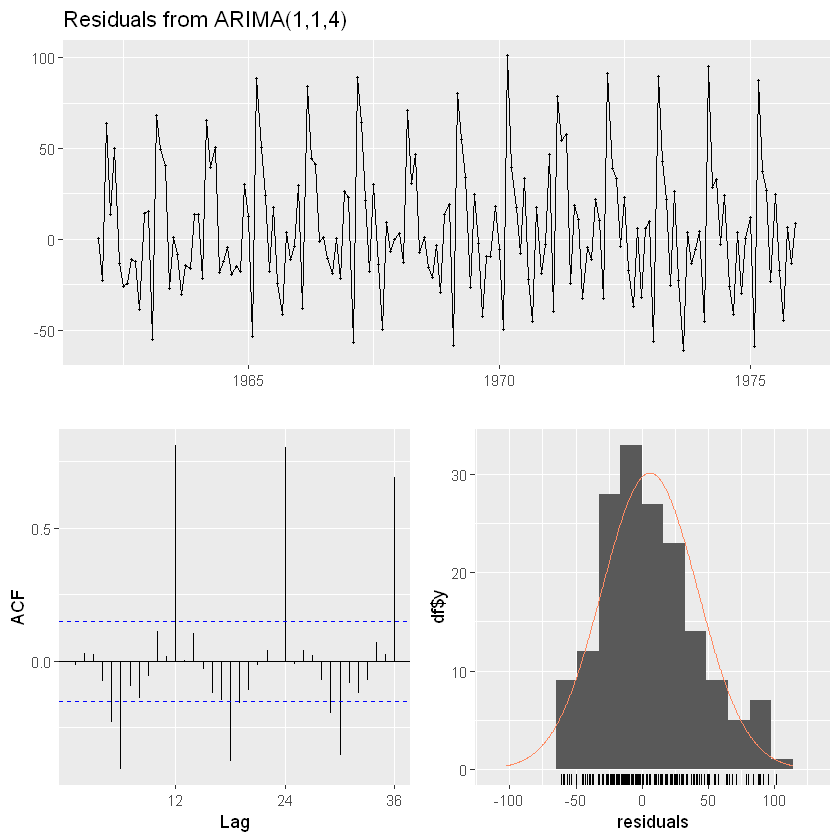

In [19]:
#previously, we have fit milk_arima as a non-seasonal arima model with learnt parameters
#milk_arima <- auto.arima(milk_ts, seasonal = FALSE)
checkresiduals(milk_arima)

**Question**

Is the above ***milk_arima*** good model for forecasting the monthly milk production?

No. There are many large repeating correlations in the residuals.

### Exercise 3 -- 4 points

Re-train the milk_arima as a seasonal arima model with learnt parameters and evaluate its goodness

[1]  864.9773  817.7493  924.4056  937.4836 1000.6235  973.2165  931.8501
 [8]  892.2597  846.3679  851.5326  817.4931  859.7534  882.8150  835.5870
[15]  942.2433  955.3213 1018.4612  991.0542  949.6878  910.0975  864.2056
[22]  869.3703  835.3308  877.5911

Series: milk_ts 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.2204  -0.6214
s.e.   0.0748   0.0627

sigma^2 = 53.42:  log likelihood = -530.15
AIC=1066.3   AICc=1066.46   BIC=1075.43

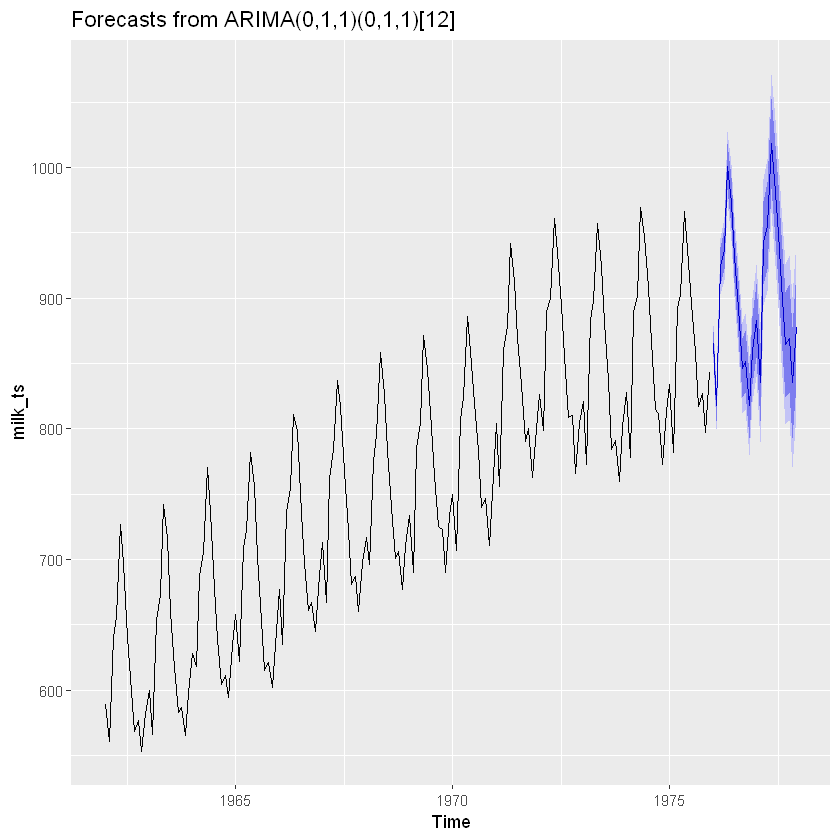


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 17.3, df = 22, p-value = 0.7466

Model df: 2.   Total lags used: 24



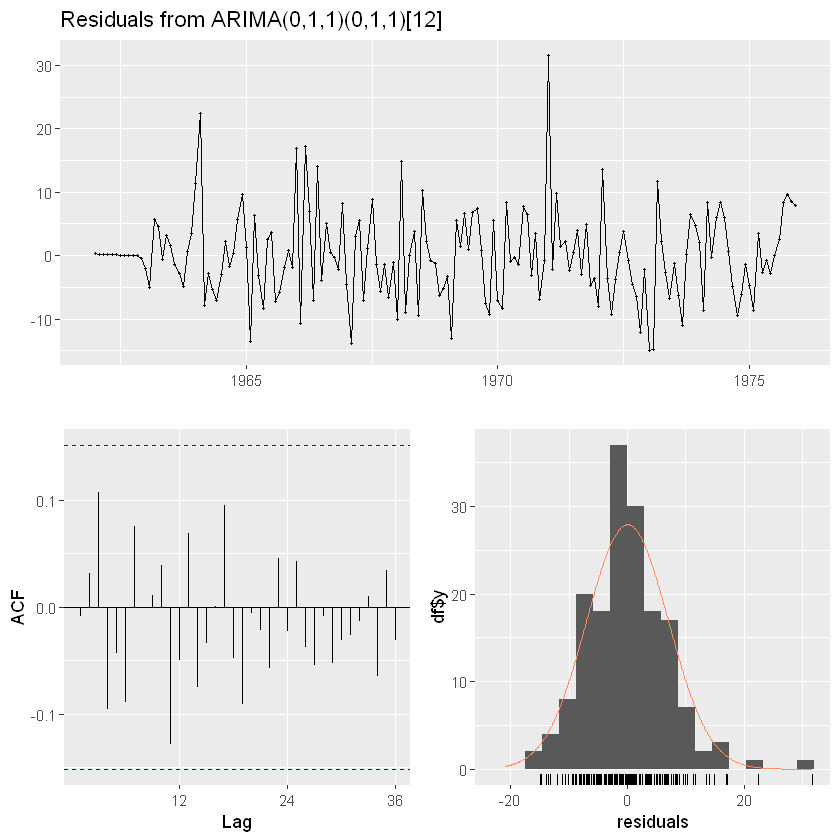

In [21]:
#YOUR CODE GOES HERE

#load dataset
milk <- read.csv('data/monthly-milk-production-pounds-p.csv', header = TRUE)
names(milk) <- c('month','production')
#create a time series object
milk_ts = ts(milk$production,frequency = 12, start = 1962)

#fit a non-seasonal arima model with learnt parameters
milk_arima <- auto.arima(milk_ts, seasonal = TRUE)

#forecast for the next 24 months
milk_forecast <- forecast(milk_arima, h = 24)

#views the forecast's mean
c(milk_forecast$mean)

#plot the forecast
autoplot(milk_forecast)

#inspect model
milk_arima

#residual check
checkresiduals(milk_arima)


This seems a lot better

# References

List of packages and utilities for time series analysis with R: [CRAN Task View: Time Series Analysis](https://cran.r-project.org/web/views/TimeSeries.html)

Advanced time series analysis: [Forecasting: principles and practice](https://www.otexts.org/fpp)